## **Import Libraries**

In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import scipy
import soundfile as sf
import os
import pandas as pd
from collections import defaultdict

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
genre_dict = {
    'hiphop': '100/100478.mp3',
    'electronic': '100/100497.mp3',
    'rock': '100/100799.mp3',
    'international': '101/101111.mp3',
    'experimental': '101/101864.mp3',
    'instrumental': '103/103518.mp3',
    'folk': '104/104008.mp3',
    'pop': '104/104064.mp3'
}

path_audio_files = '/content/drive/MyDrive/FMA_DATASET/fma_small/fma_small/'

## **Wave Form**

The waveform is the simplest representation of an audio signal — a plot of amplitude versus time. It shows how the audio's energy fluctuates over time.

- **X-axis:** Time (in seconds)  
- **Y-axis:** Amplitude of the signal  

Although it doesn’t capture frequency content, it’s useful for visualizing:
- Silence and active regions  
- Peaks and loudness  
- Envelope of sound

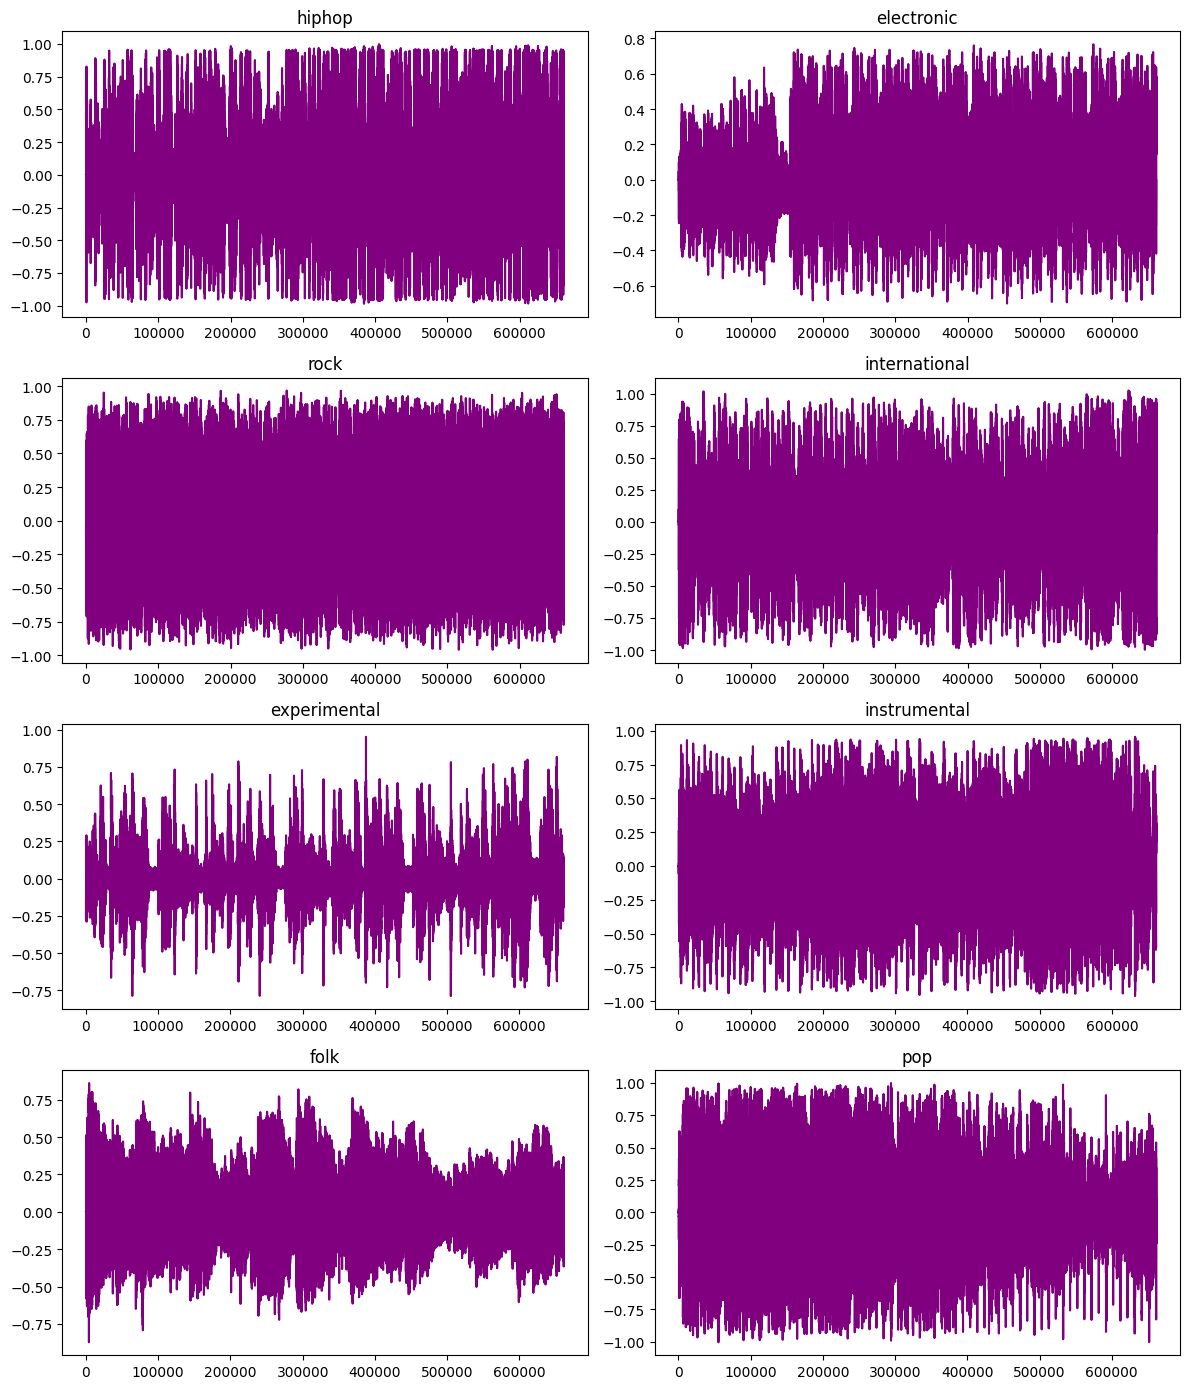

In [5]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 14))
i = j = 0

for genre, filename in genre_dict.items():
    y, sr = librosa.load(path_audio_files + filename)
    axes[i][j].plot(y, color="purple")
    axes[i][j].set_title(genre)

    j = 0 if j == 1 else j + 1
    i += 1 if j == 0 else 0

plt.tight_layout()
plt.show()

## **Zero Crossing Rate**

Zero Crossing Rate (ZCR) is the rate at which the audio signal changes its sign — from positive to negative or vice versa.

- High ZCR = noisier or high-pitched signals (like cymbals)
- Low ZCR = smoother signals (like bass, cello)

---

Let \\( x[n] \\) be the audio signal:

$$
ZCR = \frac{1}{T} \sum_{n=1}^{T} \mathbb{1}_{\{x[n] \cdot x[n-1] < 0\}}
$$

Where:

- \\( T \\): total number of samples in the frame  
- \\( \mathbb{1} \\): indicator function (1 if condition is true, else 0)

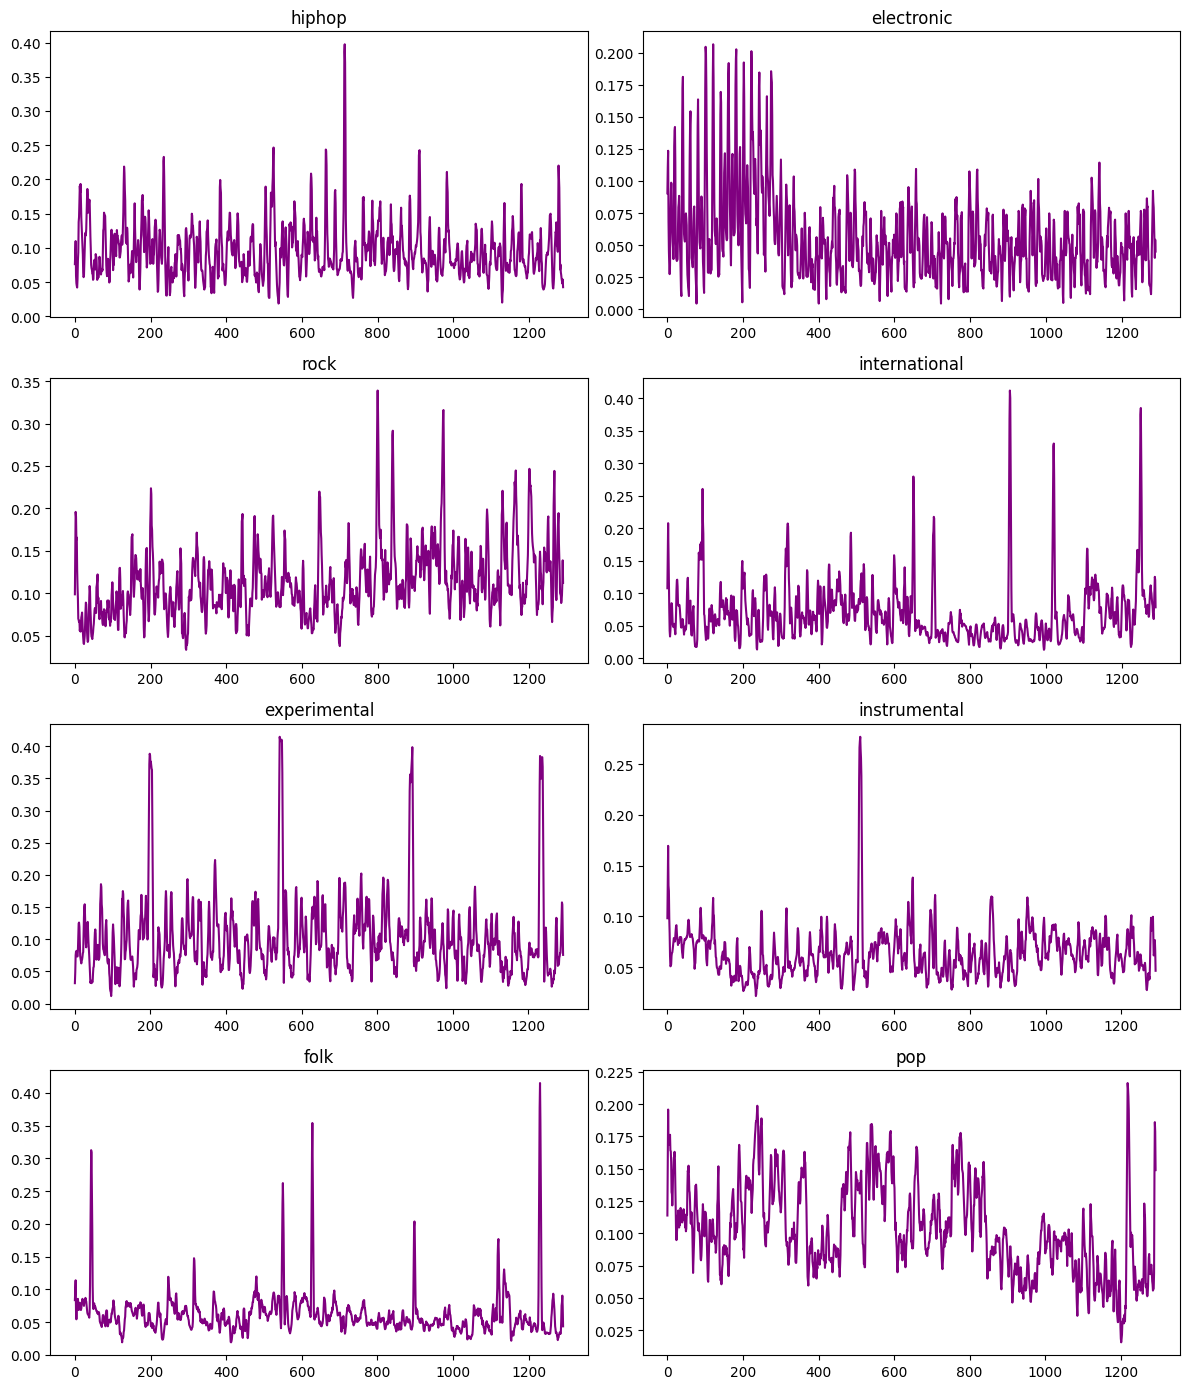

In [6]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 14))
i = j = 0

for genre, filename in genre_dict.items():
    y, sr = librosa.load(path_audio_files + filename)
    zcr = librosa.feature.zero_crossing_rate(y)[0]
    axes[i][j].plot(zcr, color="purple")
    axes[i][j].set_title(genre)

    j = 0 if j == 1 else j + 1
    i += 1 if j == 0 else 0

plt.tight_layout()
plt.show()

## **STFT (Short Time Fourier Transforms)**

STFT provides time-frequency representation of a signal by applying the Fourier Transform to short overlapping windows of the audio signal.

- Allows us to observe how frequency content changes over time.
- Key for audio analysis, speech, music, etc.
---

$$
STFT\{x(t)\}(m, \omega) = \sum_{n=-\infty}^{\infty} x[n] \cdot w[n - m] \cdot e^{-j \omega n}
$$

Where:

- \\( w[n] \\): window function (e.g. Hamming)  
- \\( m \\): time index (frame)  
- \\( \omega \\): frequency bin

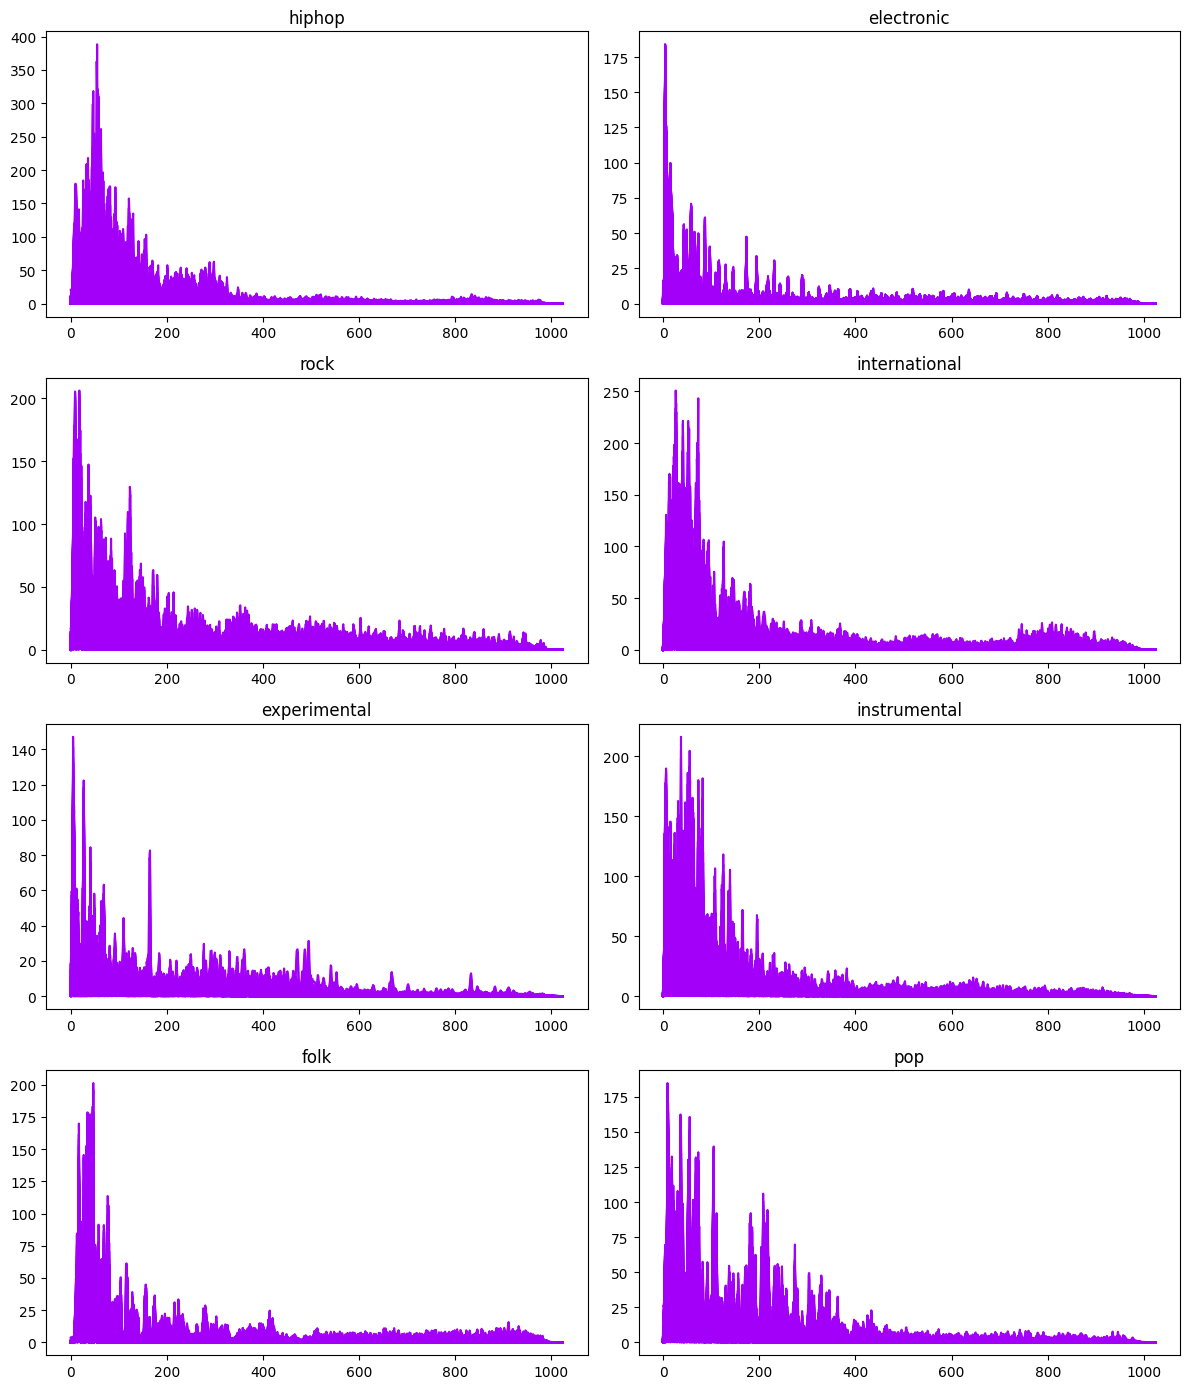

In [7]:
n_fft = 2048
hop_length = 512

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 14))
i = j = 0

for genre, filename in genre_dict.items():
    y, sr = librosa.load(path_audio_files + filename)
    stft = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))
    axes[i][j].plot(stft, color="#A300F9")
    axes[i][j].set_title(genre)

    j = 0 if j == 1 else j + 1
    i += 1 if j == 0 else 0

plt.tight_layout()
plt.show()

## **Spectrogram**

A spectrogram is a visual representation of the spectrum of frequencies in a signal as it varies over time. It is the magnitude of the STFT.

- Often shown in dB scale using a color map.
- X-axis: Time  
- Y-axis: Frequency (log scale)  
- Color: Magnitude in decibels (dB)
---
$$
\text{Spectrogram}(t, f) = 20 \cdot \log_{10} \left| STFT\{x(t)\} \right|
$$

In [12]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np

# İlk 4 genre'ı alalım
selected_genres = list(genre_dict.items())[:4]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes = axes.flatten()

for idx, (genre, filename) in enumerate(selected_genres):
    y, sr = librosa.load(path_audio_files + filename)
    S = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))
    DB = librosa.amplitude_to_db(S, ref=np.max)

    img = librosa.display.specshow(DB, sr=sr, hop_length=hop_length,
                                    x_axis='time', y_axis='log', cmap='cool', ax=axes[idx])
    axes[idx].set_title(genre)
    fig.colorbar(img, ax=axes[idx], format="%+2.0f dB")

plt.tight_layout()
plt.savefig('spectrograms_selected.png', dpi=300, bbox_inches='tight')
plt.close()


## **Mel Spectrogram**

The Mel Spectrogram maps frequency to the Mel scale — a scale that mimics human hearing sensitivity. It is obtained by applying a Mel filterbank to the spectrogram.

- Better suited for speech/music perception
- X-axis: Time  
- Y-axis: Mel-frequency bands

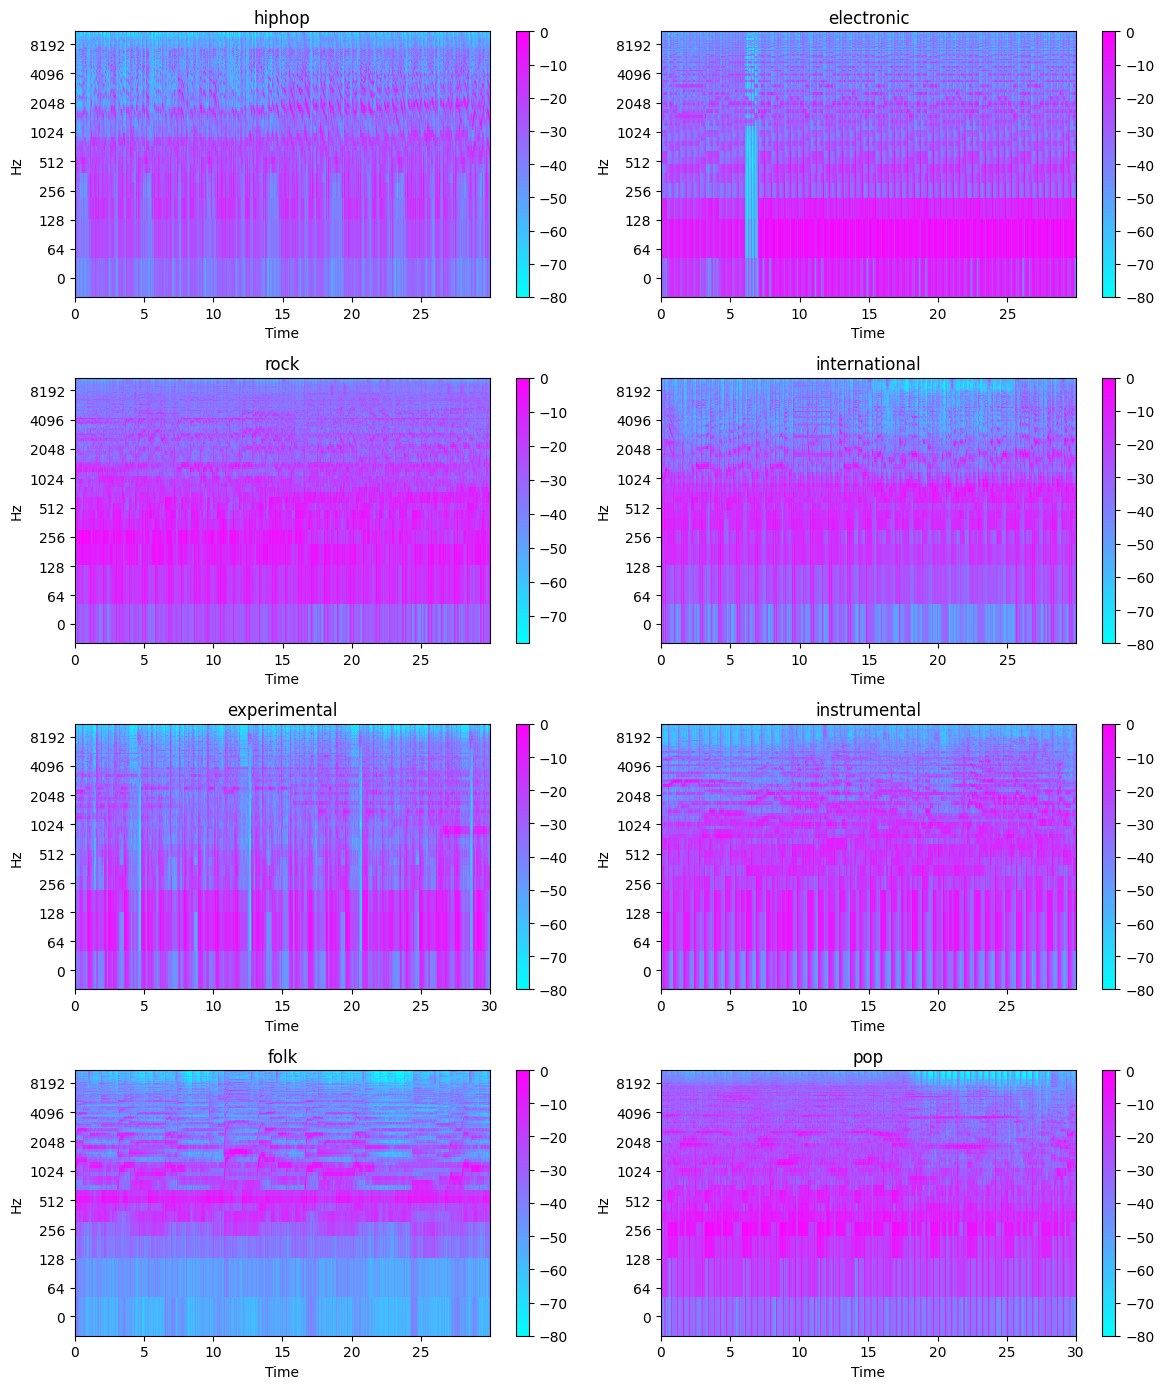

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 14))
i = j = 0

for genre in genre_dict.keys():
    path = path_audio_files + genre_dict[genre]
    data, sampling_rate = librosa.load(path)

    mel_spec = librosa.feature.melspectrogram(y=data, sr=sampling_rate, hop_length=hop_length)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

    img = librosa.display.specshow(
        mel_spec_db,
        sr=sampling_rate,
        hop_length=hop_length,
        x_axis='time',
        y_axis='log',
        cmap='cool',
        ax=axes[i][j]
    )

    fig.colorbar(img, ax=axes[i][j])
    axes[i][j].set_title(genre)

    if j == 1:
        i += 1
        j = 0
    else:
        j += 1

plt.tight_layout()
plt.show()

## **Mel Frequency Cepstral Coefficients**

MFCCs are compact representations of the spectral envelope of audio signals. Widely used in speech and music genre recognition.

Steps:
1. Take Mel Spectrogram
2. Apply Discrete Cosine Transform (DCT)
3. Keep the first N coefficients (excluding 0th sometimes)

---

$$
MFCC_k = \sum_{n=0}^{N-1} \log(S[n]) \cdot \cos\left[ \frac{\pi k (n + 0.5)}{N} \right]
$$

Where:

- \\( S[n] \\): Mel filterbank energy  
- \\( k \\): coefficient index  
- \\( N \\): number of Mel bands

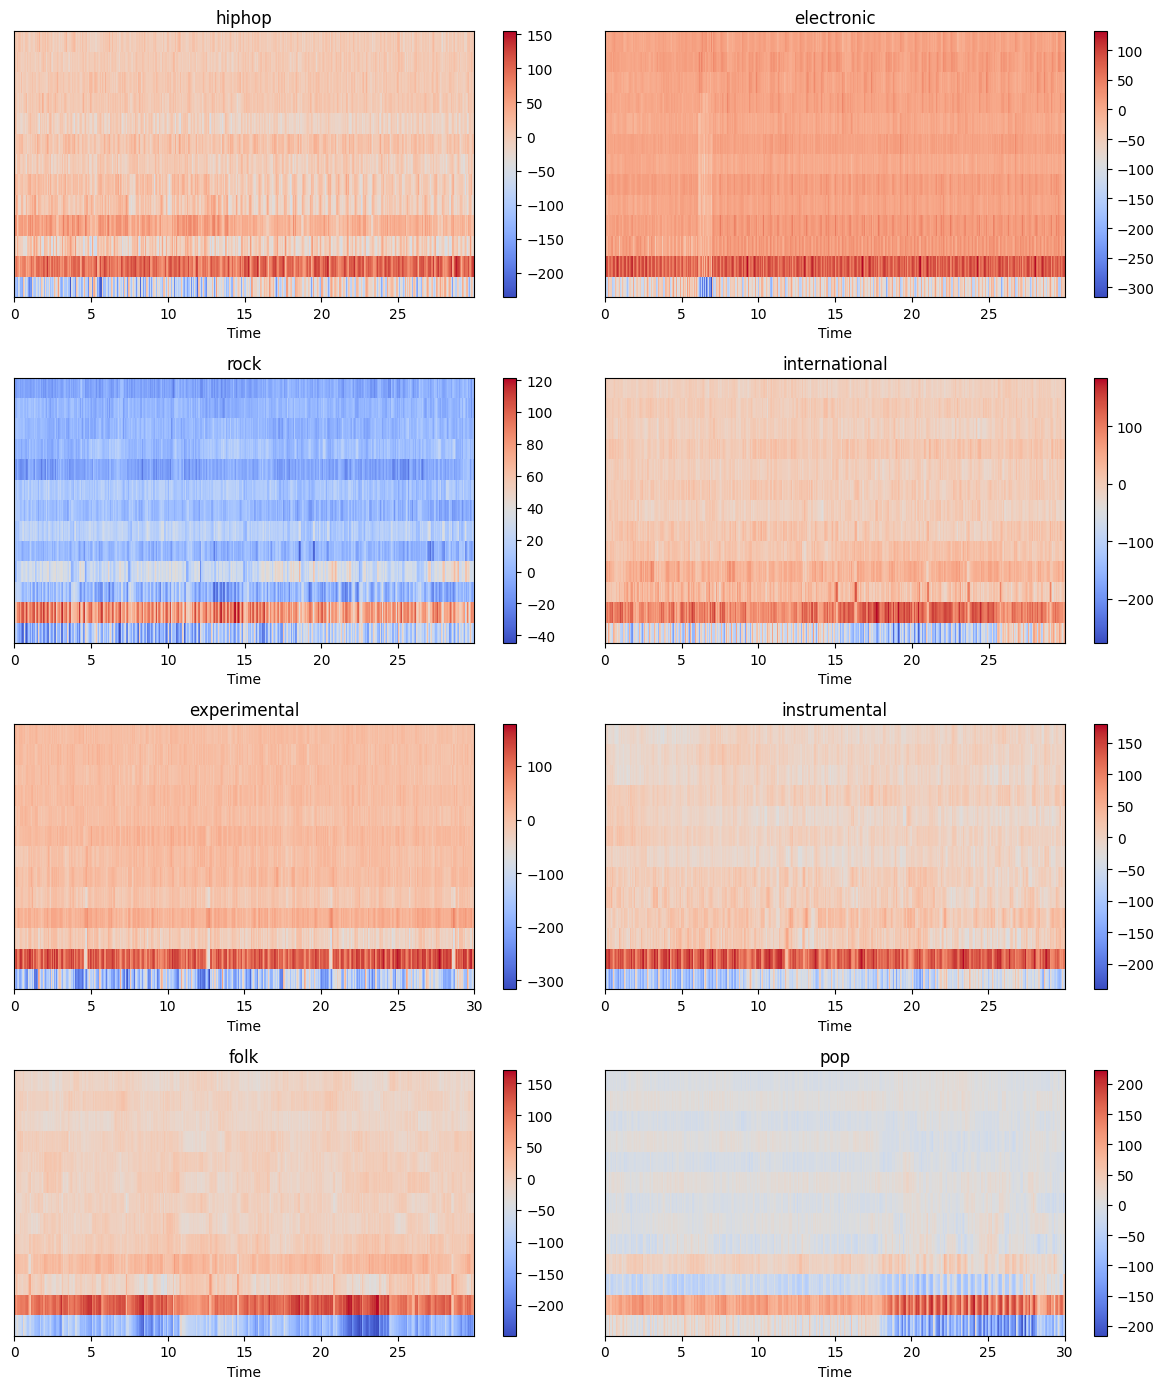

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 14))
i = j = 0

for genre, filename in genre_dict.items():
    y, sr = librosa.load(path_audio_files + filename)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    img = librosa.display.specshow(mfccs, x_axis='time', ax=axes[i][j])
    axes[i][j].set_title(genre)
    fig.colorbar(img, ax=axes[i][j])

    j = 0 if j == 1 else j + 1
    i += 1 if j == 0 else 0

plt.tight_layout()
plt.show()

## **Chromagram**

A Chromagram shows the intensity of each of the 12 pitch classes (C, C#, D, ..., B) over time, regardless of octave.

- Good for detecting chords, harmony, and key
- X-axis: Time  
- Y-axis: Pitch class (12 notes)

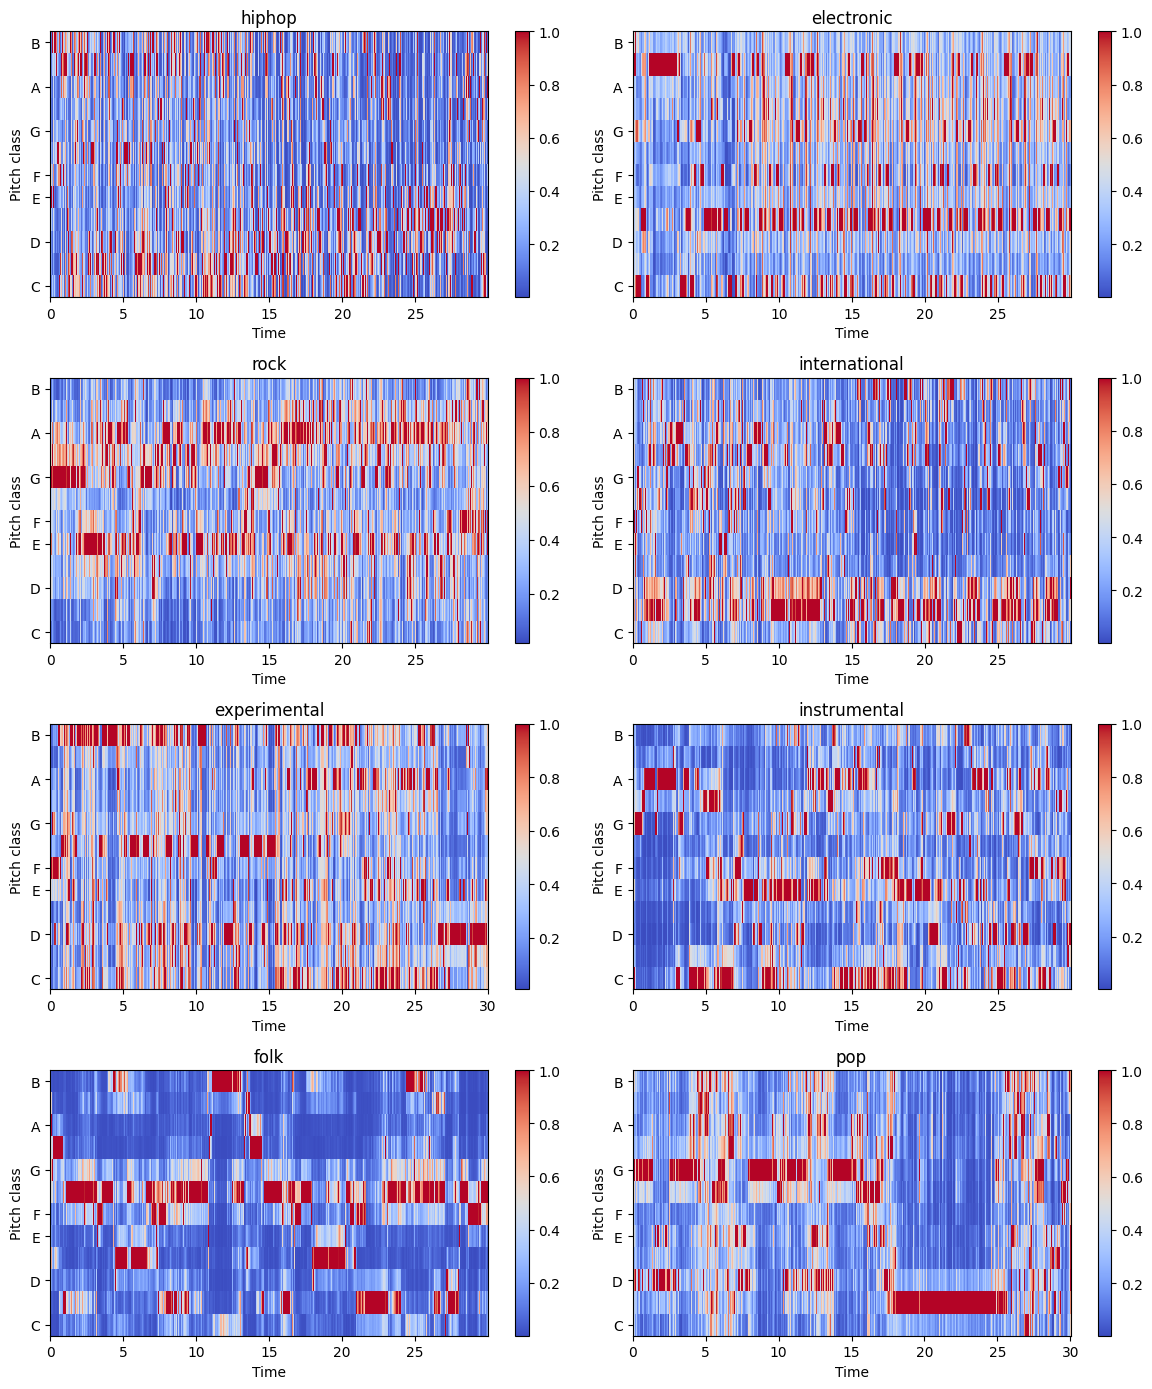

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 14))
i = j = 0

for genre, filename in genre_dict.items():
    y, sr = librosa.load(path_audio_files + filename)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    img = librosa.display.specshow(chroma, x_axis='time', y_axis='chroma', cmap='coolwarm', ax=axes[i][j])
    axes[i][j].set_title(genre)
    fig.colorbar(img, ax=axes[i][j])

    j = 0 if j == 1 else j + 1
    i += 1 if j == 0 else 0

plt.tight_layout()
plt.show()

## **Spectral Centroids**

Spectral Centroid indicates the "center of mass" of the spectrum — perceived as brightness of a sound.

- Higher centroid = brighter, sharper sound
- Lower centroid = darker, duller sound

---

$$
\text{Centroid} = \frac{ \sum_{k} f_k \cdot |X[k]| }{ \sum_{k} |X[k]| }
$$

Where:

- \\( f_k \\): frequency at bin \\( k \\)  
- \\( X[k] \\): magnitude of the FFT at bin \\( k \\)

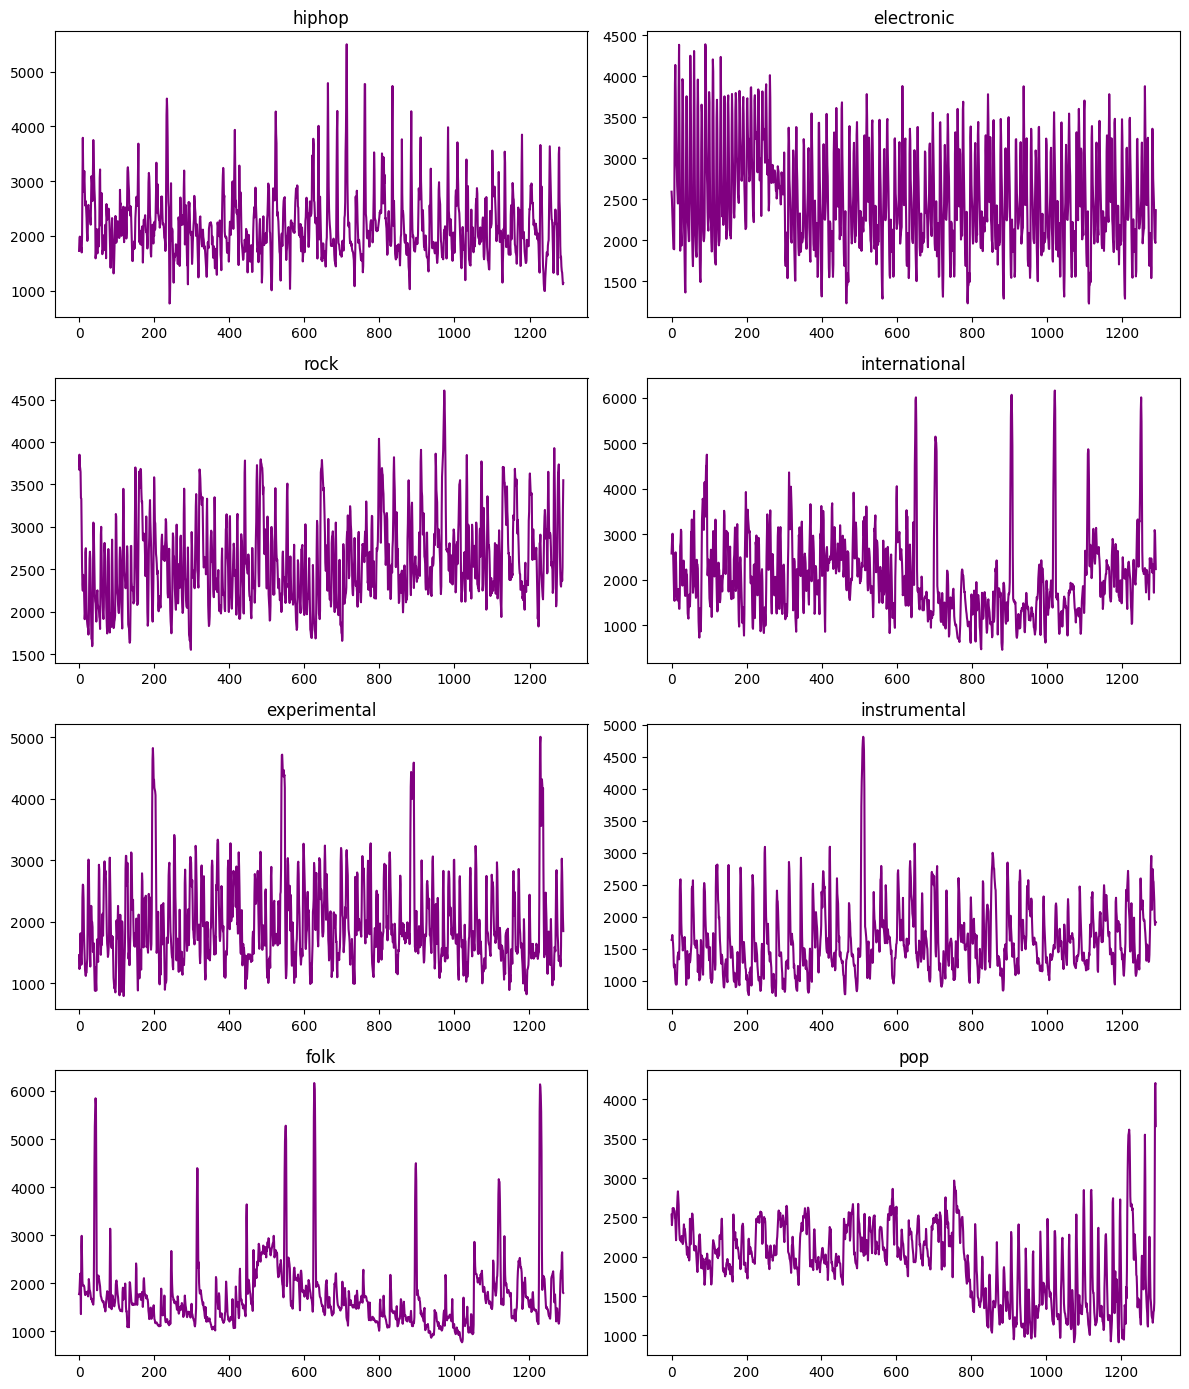

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 14))
i = j = 0

for genre, filename in genre_dict.items():
    y, sr = librosa.load(path_audio_files + filename)
    cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    axes[i][j].plot(cent[0], color="purple")
    axes[i][j].set_title(genre)

    j = 0 if j == 1 else j + 1
    i += 1 if j == 0 else 0

plt.tight_layout()
plt.show()

## **Spectral Bandwidth**

Spectral Bandwidth describes the spread of the spectrum around its centroid. It reflects the range of frequencies present.

- High bandwidth = more noise, more spread
- Low bandwidth = pure tone

---

$$
\text{Bandwidth} = \sqrt{ \frac{ \sum_k (f_k - \mu)^2 \cdot |X[k]| }{ \sum_k |X[k]| } }
$$

Where:

- \\( \mu \\): spectral centroid  
- \\( f_k \\): frequency bin

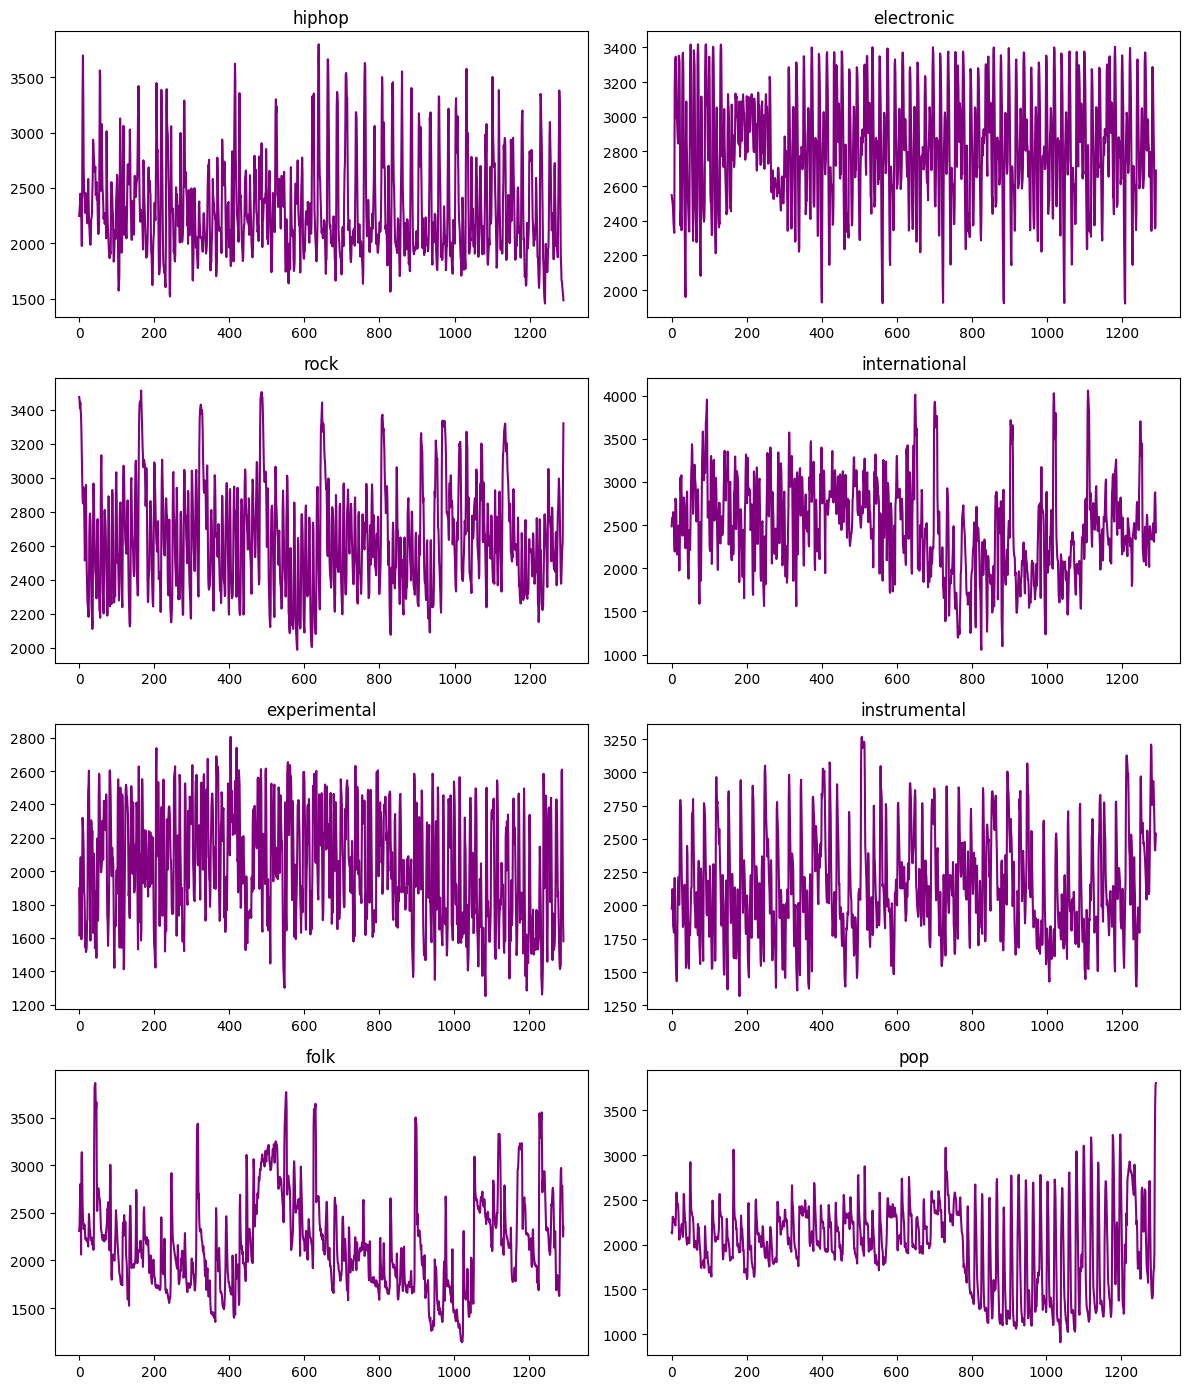

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 14))
i = j = 0

for genre, filename in genre_dict.items():
    y, sr = librosa.load(path_audio_files + filename)
    bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    axes[i][j].plot(bw[0], color="purple")
    axes[i][j].set_title(genre)

    j = 0 if j == 1 else j + 1
    i += 1 if j == 0 else 0

plt.tight_layout()
plt.show()

## **Tempo and Beats**

Tempo refers to the speed of the music in Beats Per Minute (BPM). Beat tracking attempts to locate the beat positions over time.

- Detected using onset strength + periodicity
- X-axis: Time  
- Vertical lines: Beat positions

_Usually implemented using autocorrelation or dynamic programming on onset envelopes._

<ipython-input-40-0cc0e21fc657>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  axes[i][j].set_title(f"{genre} - {float(tempo):.1f} BPM")


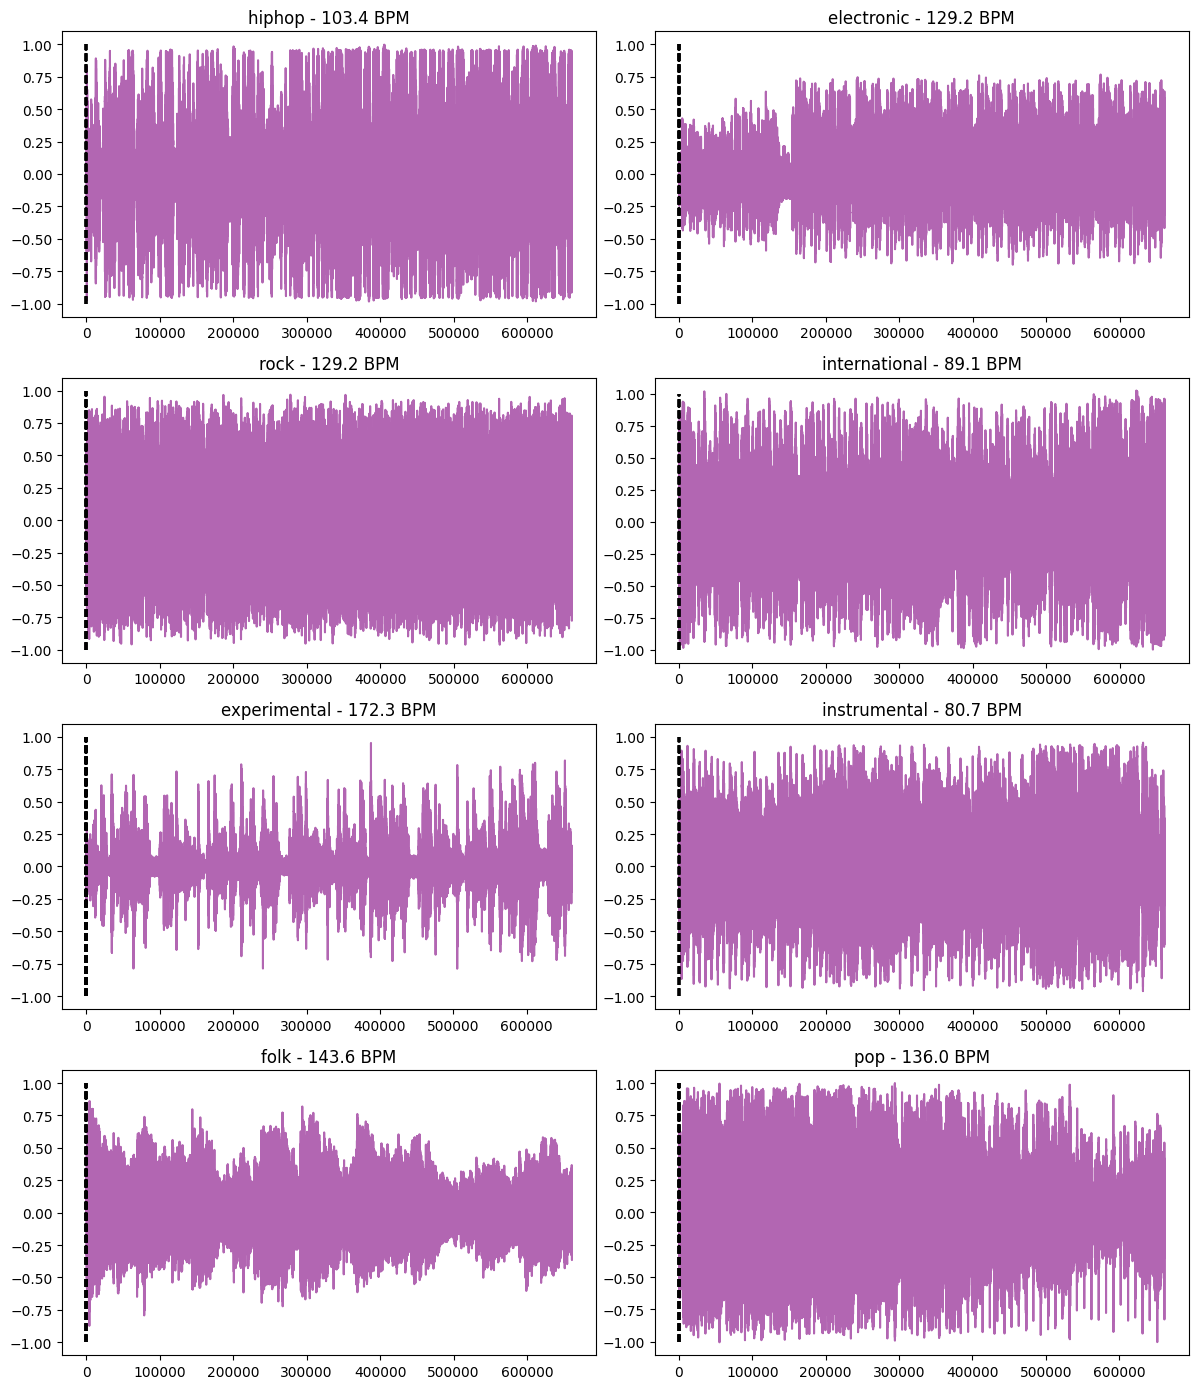

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 14))
i = j = 0

for genre, filename in genre_dict.items():
    y, sr = librosa.load(path_audio_files + filename)
    tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
    beat_times = librosa.frames_to_time(beats, sr=sr)
    axes[i][j].plot(y, color="purple", alpha=0.6)
    axes[i][j].vlines(beat_times, -1, 1, color="black", linestyle="--", alpha=0.8)
    axes[i][j].set_title(f"{genre} - {float(tempo):.1f} BPM")

    j = 0 if j == 1 else j + 1
    i += 1 if j == 0 else 0

plt.tight_layout()
plt.show()


## **Spectral Rolloff**

Spectral Rolloff is the frequency below which a certain percentage (usually 85%) of the total spectral energy is contained.

- Indicates whether sound is dominated by high or low frequencies.

---

$$
\sum_{k=0}^{k_r} |X[k]| = 0.85 \cdot \sum_{k=0}^{N-1} |X[k]|
$$

Where:

- \\( k_r \\): rolloff bin  
- \\( X[k] \\): FFT magnitude

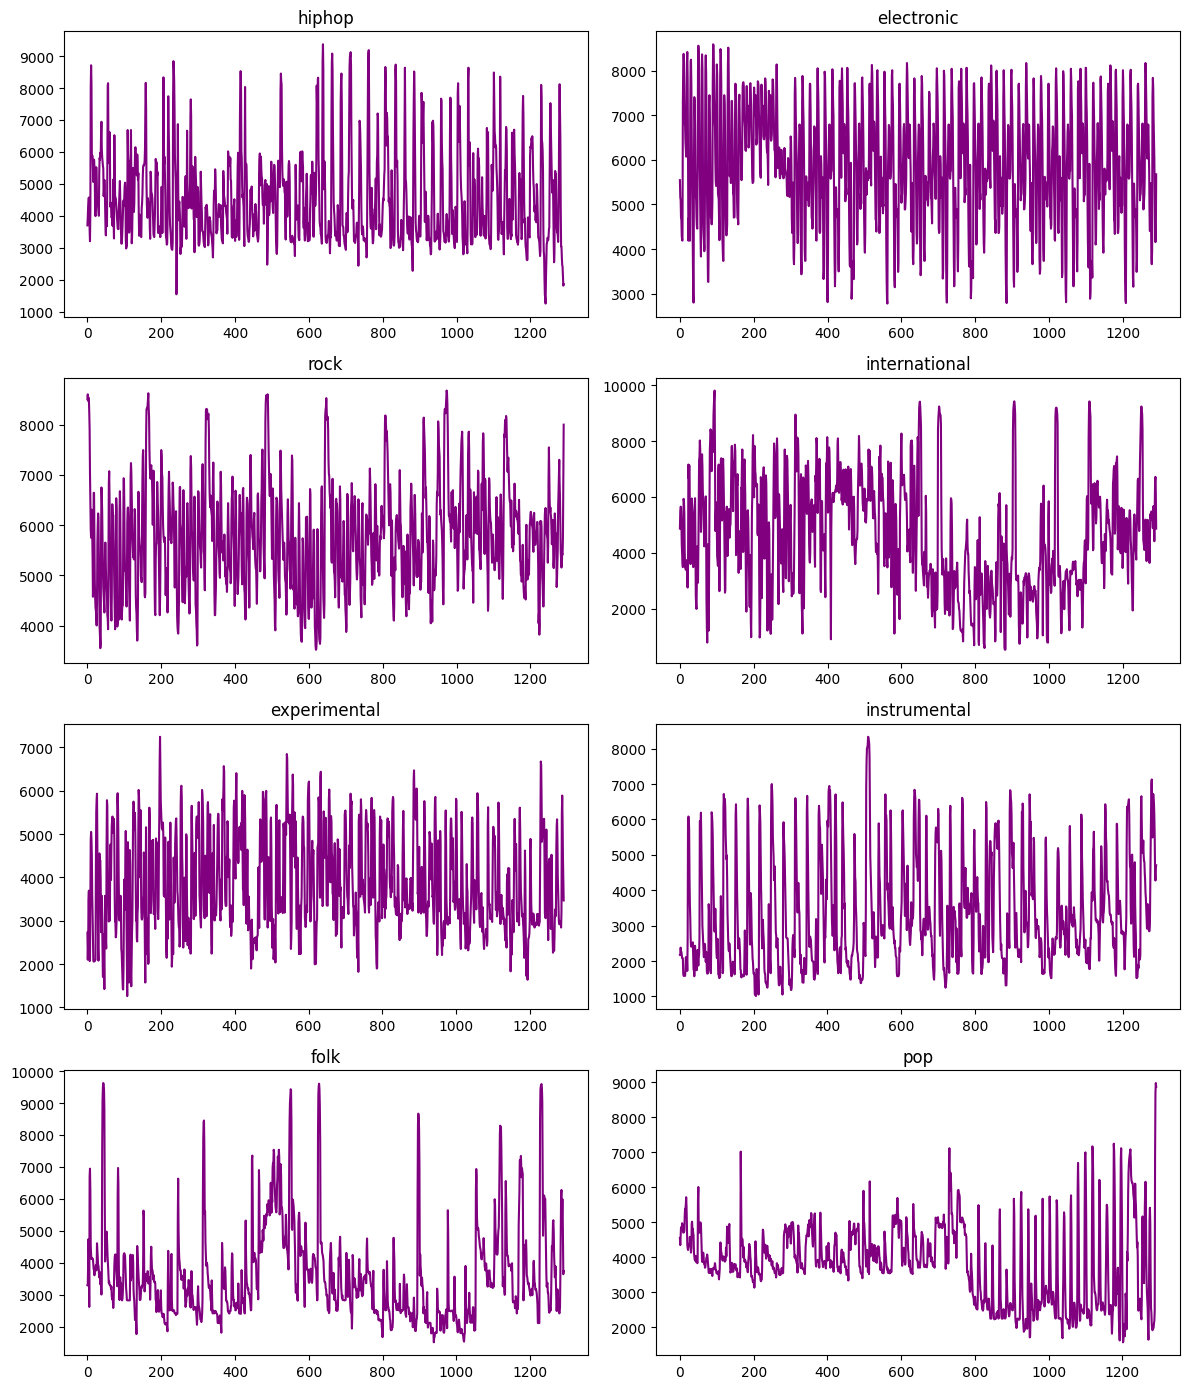

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 14))
i = j = 0

for genre, filename in genre_dict.items():
    y, sr = librosa.load(path_audio_files + filename)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    axes[i][j].plot(rolloff[0], color="purple")
    axes[i][j].set_title(genre)

    j = 0 if j == 1 else j + 1
    i += 1 if j == 0 else 0

plt.tight_layout()
plt.show()

## **Harmonic and Percussive Components**

This technique splits the audio signal into:
- **Harmonic** (sustained tonal sounds, e.g., violin)
- **Percussive** (transient, rhythmic sounds, e.g., drums)

Useful for:
- Source separation
- Beat tracking
- Music transcription

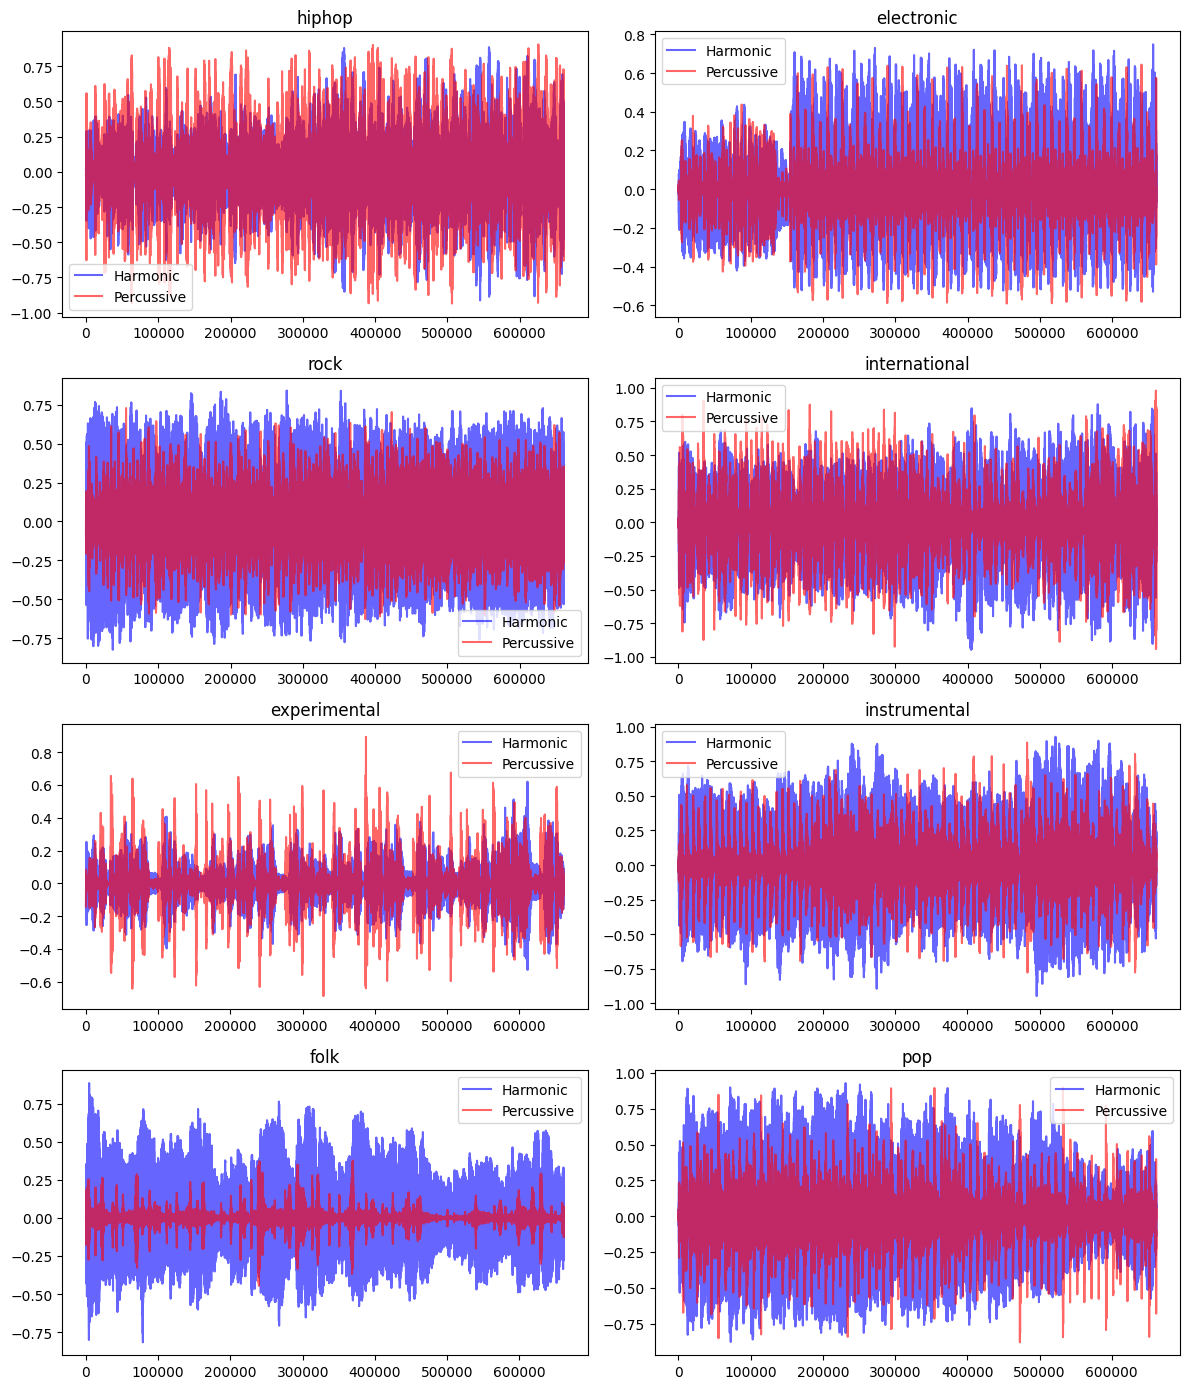

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 14))
i = j = 0

for genre, filename in genre_dict.items():
    y, sr = librosa.load(path_audio_files + filename)
    y_harm, y_perc = librosa.effects.hpss(y)
    axes[i][j].plot(y_harm, color="blue", alpha=0.6, label="Harmonic")
    axes[i][j].plot(y_perc, color="red", alpha=0.6, label="Percussive")
    axes[i][j].set_title(genre)
    axes[i][j].legend()

    j = 0 if j == 1 else j + 1
    i += 1 if j == 0 else 0

plt.tight_layout()
plt.show()